# Example of Genetic Algorithm Converging on a function

Evolution 0, best child -0.018187396459933877
Evolution 1, best child -0.013626732603083894
Evolution 2, best child -0.012606371906583286
Evolution 3, best child -0.012590941604148014
Evolution 4, best child -0.012499311194039017
Evolution 5, best child -0.011991981446336317
Evolution 6, best child -0.011568521717790842
Evolution 7, best child -0.004784318042574156
Evolution 8, best child -0.004784318042574156
Evolution 9, best child -0.004347250930572598
Evolution 10, best child -0.00454884094405462
Evolution 11, best child -0.004203838650529057
Evolution 12, best child -0.001115575087206571
Evolution 13, best child -0.0009223524834917349
Evolution 14, best child -0.0009223524834917349
Optimal Results would be 0 because the hyperbolic function reaches its maximum at 0


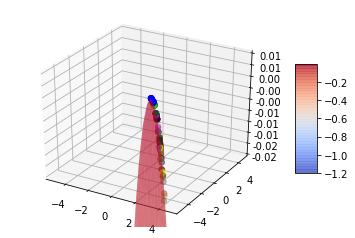

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import ann


def function_to_maximize(X, Y):
    return -1 * (X**2 / 40 + Y**2 / 40)


generation_colors = ["#330000", "#880000", "#FF0000", "#333300", "#888800", "#FFFF00",
                     "#333333", "#888888", "#330033", "#880088", "#FF00FF", "#008800",
                     "#00FF00", "#000088", "#0000FF"]

generations = len(generation_colors)

# Random Input for giggles
# The input does not really matter in this case
# The evolution algorithm is only dependant on the output
# It will however optimize the input for the output so it's
# rather useful for teaching stuff to play games :)
# eg: create a network with one input per possible action
# in the game and then evolve the network after each round
# depending on the output.

network = ann.ANN(1)

# Some Layers so that the network can learn
network.add_layer(ann.Layer(6, act=ann.sigmoid))

# Output, Should eventually become 0, 0 since that maximizes the function
network.add_layer(ann.Layer(2, act=ann.sigmoid))

# 10 Family members

# There's a bunch of other options defaults is:
#     def __init__(self, family_sz, selection_bias=0.75, verbose=True,
#                 mutation_chance=0.5, mutation_severity=0.4, inheritance=0.4):

ga = ann.Genetic(10, verbose=False)
ga.create_family(network)

ri = np.array([-10])

fig = plt.figure()
ax = fig.gca(projection='3d')

evolution = 0
for gc in generation_colors:
    xs, ys, zs = [], [], []
    evl = []
    
    best = 1000
    for member in ga:
        x, y = member.prop(ri)
        xs.append(x)
        ys.append(y)
        
        z = function_to_maximize(x, y)
        zs.append(z)

        best = min(abs(best), z)
        evl.append(z)
    
    ga.evolve(evl)
        
    print("Evolution {}, best child {}".format(evolution, best))
    
    evolution += 1
    plt.scatter(xs, ys, zs=zs, s=30, c=gc)



# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = function_to_maximize(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, alpha=0.4)

ax.set_zlim(-0.02, 0.01 )
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

print("Optimal Results would be 0 because the hyperbolic function reaches its maximum at 0")

plt.show()
